# 2.4 More Data Visualization Methods
In this section we'll look at some essential data visualizations, a scatterplot and a line chart.

## A Scatterplot
Data analysis regularly involves examining relationships between numerical variables. We may want to know the relationship between education and income, or stock prices with corporate profits. A scatterplot allows us to visualize information in 2 or 3 dimensions with numerical variables.

Scatterplots can illustrate various types of relationships. For example, we may see linear or nonlinear relationships between data, or no relationship at all!

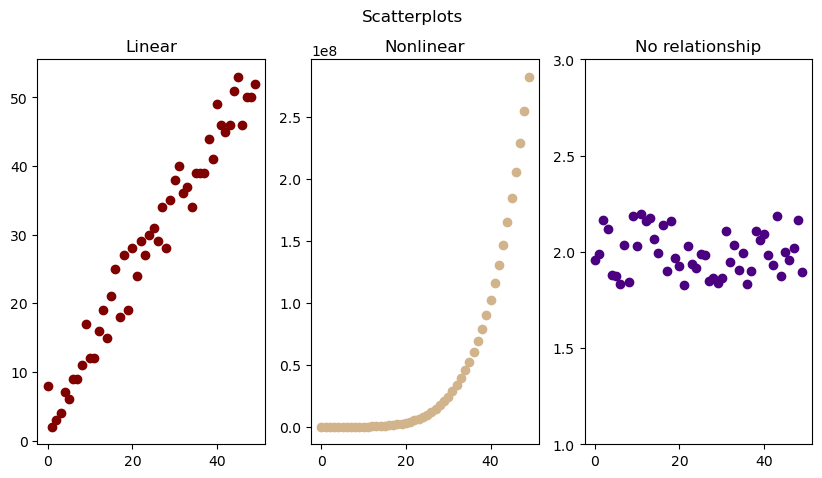

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Data.
x = range(50)
y = x + np.random.randint(0, 10, 50) 
y2 = x ** np.array(5)
y3 = [2 for x in range(50)] + np.random.uniform(-0.2,0.2, 50)

# Graph.
fig, (s1, s2, s3) = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle('Scatterplots')

s1.scatter(x, y, c='maroon')
s1.set_title('Linear')

s2.scatter(x, y2, c='tan')
s2.set_title('Nonlinear')

s3.scatter(x, y3, c='indigo')
s3.set_title('No relationship')
s3.set_ylim([1, 3])
s3.set_yticks([1, 1.5, 2, 2.5, 3])

plt.show()

In [183]:
""" EXAMPLE 2.7

Using the PG_Sales datset let's look at the relationship between price and the square footage
"""
import pandas as pd
# Read data.
PG_Sales = pd.read_csv('PG_Sales.csv', index_col=False)
PG_Sales.head(5)

,Transaction,Price,Sqft,Bedrooms,Baths,Year Built,Type
0,1,200,1684,3,2.0,2005,Single
1,2,435,2358,3,2.5,2017,Single
2,3,265,1001,2,2.0,1978,Single
3,4,300,1238,2,2.0,2000,Single
4,5,170,1170,3,2.0,2008,Single


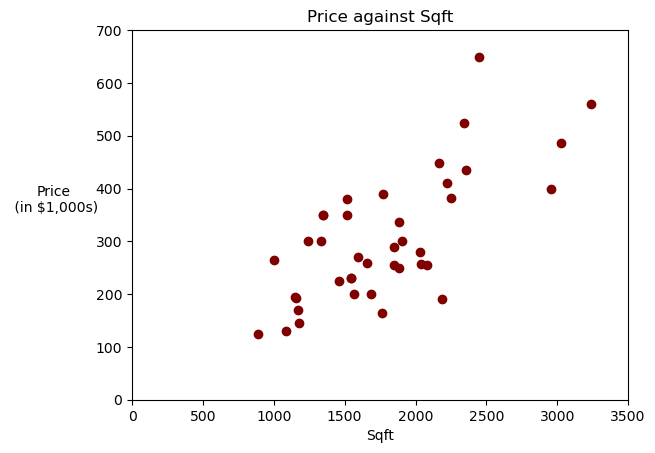

In [184]:
fig, pg_scatter = plt.subplots()

pg_scatter.scatter(PG_Sales['Sqft'], PG_Sales['Price'], c='maroon')

pg_scatter.set_xticks([x*500 for x in range(8)])
pg_scatter.set_yticks([y*100 for y in range(8)])

pg_scatter.set_ylabel('Price\n (in $1,000s)', rotation=0, labelpad=30)
pg_scatter.set_xlabel('Sqft')
pg_scatter.set_title('Price against Sqft')
plt.show()

## A Scatterplot with a Categorical Variable
We can also include categorical distinctions in our scatterplots. For example, we may want to identify the relationship between price and sqft for singles and condos. Let's do this.

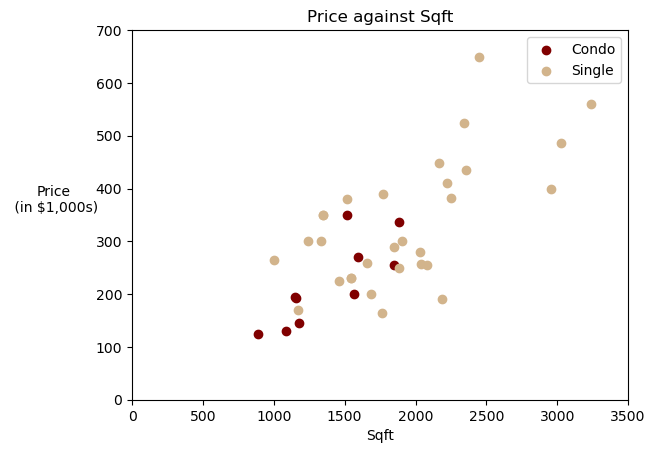

In [185]:
fig, pg_scatter2 = plt.subplots()

# Mask for category type.
is_condo = PG_Sales['Type'] == 'Condo'

pg_scatter2.scatter(PG_Sales.loc[is_condo]['Sqft'], PG_Sales.loc[is_condo]['Price'], c='maroon')
pg_scatter2.scatter(PG_Sales.loc[~is_condo]['Sqft'], PG_Sales.loc[~is_condo]['Price'], c='tan')


pg_scatter2.set_xticks([x*500 for x in range(8)])
pg_scatter2.set_yticks([y*100 for y in range(8)])

pg_scatter2.legend(['Condo', 'Single'])

pg_scatter2.set_ylabel('Price\n (in $1,000s)', rotation=0, labelpad=30)
pg_scatter2.set_xlabel('Sqft')
pg_scatter2.set_title('Price against Sqft')

plt.show()

## A Line Chart
A **line chart** displays a numerical variable as consecutive observations connected by a line. This helps us identify trends over time. For example, the approval of a politician.

In [186]:
""" EXAMPLE 2.9
Let's take a look at the monthly stock prices of Apple and Merck & Co.
"""
# Open dataset.
apple_merck = pd.read_csv('Apple_Merck.csv', index_col=False)
apple_merck['Date'] = pd.to_datetime(apple_merck['Date'])
apple_merck.head(5)

,Date,Apple,Merck
0,2016-01-01,90.96,44.98
1,2016-02-01,90.35,44.57
2,2016-03-01,102.40,46.97
3,2016-04-01,88.07,49.11
4,2016-05-01,93.82,50.38


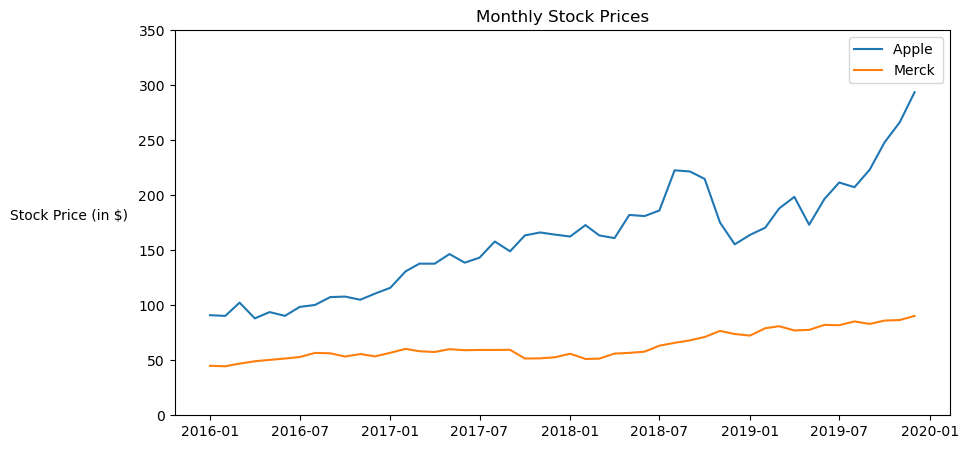

In [187]:
from datetime import datetime

# Create graph.
fig, stocks = plt.subplots(figsize=(10,5))

for i in apple_merck.columns[1:]:
    stocks.plot(apple_merck['Date'], apple_merck[i], label=i)

stocks.legend(apple_merck.columns[1:])

stocks.set_yticks([x*50 for x in range(8)])

stocks.set_ylabel('Stock Price (in $)', rotation=0, labelpad=50)
stocks.set_title('Monthly Stock Prices')

plt.show()